# 几何变换
## 目标
- 学习对图像进行各种几个变换，例如移动，旋转，仿射变换等。
- 将要学到的函数有： cv2.getPerspectiveTransform。  

## 变换
OpenCV 提供了两个变换函数， cv2.warpAffine 和 cv2.warpPerspective，
使用这两个函数你可以实现所有类型的变换。 cv2.warpAffine 接收的参数是
2 × 3 的变换矩阵，而 cv2.warpPerspective 接收的参数是 3 × 3 的变换矩
阵。  


## 10.1 扩展缩放(Scaling)
扩展缩放只是改变图像的尺寸大小。 OpenCV 提供的函数 cv2.resize()可以实现这个功能。图像的尺寸可以自己手动设置，你也可以指定缩放因子。我们可以选择使用不同的插值方法。在缩放时我们推荐使用cv2.INTER_AREA，在扩展时我们推荐使用cv2.INTER_CUBIC（慢)和cv2.INTER_LINEAR。默认情况下所有改变图像尺寸大小的操作使用的插值方法都是cv2.INTER_LINEAR。


Resize(src, dst, interpolation=CV_INTER_LINEAR)  
你可以使用下面任意一种方法改变图像的尺寸：

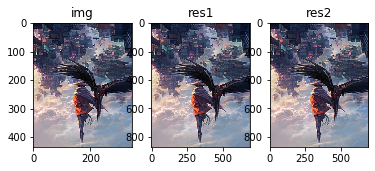

In [42]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread('messi5.jpg')
# 下面的 None 本应该是输出图像的尺寸，但是因为后边我们设置了缩放因子
# 因此这里为 None
res1=cv2.resize(img,None,fx=2,fy=2,interpolation=cv2.INTER_CUBIC)
#OR
# 这里呢，我们直接设置输出图像的尺寸，所以不用设置缩放因子
height,width=img.shape[:2]
res2=cv2.resize(img,(2*width,2*height),interpolation=cv2.INTER_CUBIC)

imageRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
res1RGB = cv2.cvtColor(res1,cv2.COLOR_BGR2RGB)
res2RGB = cv2.cvtColor(res2,cv2.COLOR_BGR2RGB)

plt.subplot(131),plt.imshow(imageRGB),plt.title('img')
plt.subplot(132),plt.imshow(res1RGB),plt.title('res1')
plt.subplot(133),plt.imshow(res2RGB),plt.title('res2')
plt.show()

## 10.2 平移(Translation)
平移就是将对象换一个位置。如果你要沿（x，y）方向移动，移动的距离是（t<sub>x</sub>，t<sub>y</sub>）你可以以下面的方式构建移动矩阵：
$$M =\begin{bmatrix}
{1}&{0}&{t_{x}}\\
{0}&{1}&{t_{y}}\\
\end{bmatrix}$$
你可以使用 Numpy 数组构建这个矩阵（数据类型是 np.float32），然
后把它传给函数 cv2.warpAffine()。看看下面这个例子吧，它被移动了
（ 100,50）个像素。

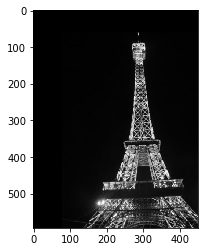

In [8]:
import cv2
import numpy as np

img = cv2.imread("tower.jpg",0)
height,width=img.shape[:2]## 注意这里

M = np.float32([[1,0,80],[0,1,60]])
dst = cv2.warpAffine(img,M,(width,height)) ## 注意着三个参数，顺序


imageRGB = cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

### <table ><tr ><td bgcolor=red><p algin=left>警告：函数 cv2.warpAffine() 的第三个参数的是输出图像的大小，它的格式应该是图像的（宽，高）。应该记住的是图像的宽对应的是列数，高对应的是行数。</p></td></tr><table>

## 10.3 旋转（Rotation）
对一个图像旋转角度θ,需要使用到下面形式的旋转矩阵:  
$$M =\begin{bmatrix}
{cosθ}&{-sinθ}\\
{sinθ}&{cosθ}\\
\end{bmatrix}$$
但是 OpenCV 允许你在任意地方进行旋转，但是旋转矩阵的形式应该修
改为
$$\begin{bmatrix}
{\alpha}&{\beta}&{(1-\alpha)· center:x − \beta· center:y}\\
{-\beta}&{\alpha}&{\beta· center:x + (1 − \alpha) · center:x}\\
\end{bmatrix}$$  

其中：  
     α = scale · cos θ  
     β = scale · sin θ  
为了构建这个旋转矩阵， OpenCV 提供了一个函数： cv2.getRotationMatrix2D(center,angle,scale)。  
center:旋转中心  
angle:旋转角度，正数代表逆时针旋转，左上角坐标默认（0，0）  
scale:各个方向同等扩大比例  

下面的例子是在不缩放的情况下将图像旋转 90 度。

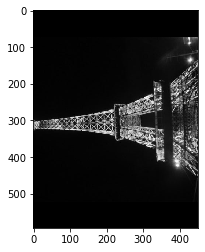

In [12]:
import cv2
import numpy as np
img=cv2.imread('tower.jpg',0)
rows,cols=img.shape
# 这里的第一个参数为旋转中心，第二个为旋转角度，第三个为旋转后的缩放因子
# 可以通过设置旋转中心，缩放因子，以及窗口大小来防止旋转后超出边界的问题
M=cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
# 第三个参数是输出图像的尺寸中心
dst=cv2.warpAffine(img,M,(cols,rows))

imageRGB = cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)
plt.imshow(imageRGB)
plt.show()

## 10.4 仿射变换(Affine Transformation)
在仿射变换中，原图中所有的平行线在结果图像中同样平行。为了创建这个矩阵我们需要从原图像中找到三个点以及他们在输出图像中的位置。然后cv2.getAffineTransform() 会创建一个 2x3 的矩阵，最后这个矩阵会被传给
函数 cv2.warpAffine()。
来看看下面的例子，以及我选择的点（被标记为绿色的点）

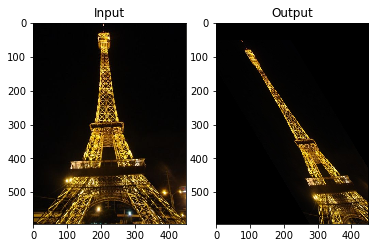

In [46]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
img=cv2.imread('tower.jpg')
rows,cols,ch=img.shape
pts1=np.float32([[50,50],[200,50],[50,200]])
pts2=np.float32([[10,100],[100,100],[100,250]])
M=cv2.getAffineTransform(pts1,pts2)
dst=cv2.warpAffine(img,M,(cols,rows))
imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
dstRGB = cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(imgRGB),plt.title('Input')
plt.subplot(122),plt.imshow(dstRGB),plt.title('Output')
plt.show()

## 10.5 透视变换(Perspective Transformation)---相当于放大或平移
对于视角变换，我们需要一个 3x3 变换矩阵。在变换前后直线还是直线。要构建这个变换矩阵，你需要在输入图像上找 4 个点，以及他们在输出图像上对应的位置。这四个点中的任意三个都不能共线。这个变换矩阵可以由函数cv2.getPerspectiveTransform() 构建。然后把这个矩阵传给函数cv2.warpPerspective()。  
代码如下：

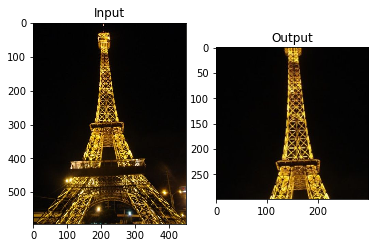

In [56]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img=cv2.imread('tower.jpg')
rows,cols,ch=img.shape
pts1 = np.float32([[56,65],[368,52],[28,387],[389,390]])
pts2 = np.float32([[0,0],[300,0],[0,300],[300,300]])
M=cv2.getPerspectiveTransform(pts1,pts2)
dst=cv2.warpPerspective(img,M,(300,300))

imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
dstRGB = cv2.cvtColor(dst,cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(imgRGB),plt.title('Input')
plt.subplot(122),plt.imshow(dstRGB),plt.title('Output')
plt.show()

## 更多资源   
[openCV官网](https://opencv.org/)   
[图像的几何变换,平移、镜像、缩放、旋转原理](https://www.cnblogs.com/wangguchangqing/p/4045150.html)